<a href="https://colab.research.google.com/github/MayerT1/LiDAR/blob/main/GEDI_2A_2B_Spatial_Fetch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install earthaccess

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 25.8 MB/s eta 0:00:00


In [3]:
!pip install geoviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 101.6 MB/s eta 0:00:00


In [1]:
import os
import h5py
import numpy as np
import pandas as pd
import geopandas as gp
from shapely.geometry import Point
import geoviews as gv
from geoviews import opts, tile_sources as gvts
import holoviews as hv
gv.extension('bokeh', 'matplotlib')
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

os.chdir('../../')

ModuleNotFoundError: No module named 'geoviews'

In [5]:
import earthaccess
import pprint

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/PhD_Main_Folder/Geo_Data/PR_GEDI_Data

/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/PR_GEDI_Data


In [5]:
path = '/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/PR_GEDI_Data'

In [9]:
!git clone https://github.com/nasa/GEDI-Data-Resources.git

Cloning into 'GEDI-Data-Resources'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 318 (delta 70), reused 90 (delta 31), pack-reused 140 (from 1)
Receiving objects: 100% (318/318), 40.18 MiB | 9.52 MiB/s, done.
Resolving deltas: 100% (111/111), done.
Updating files: 100% (38/38), done.


# Data to be downloaded:
*  https://lpdaac.usgs.gov/products/gedi02_av002/
*  https://lpdaac.usgs.gov/products/gedi02_bv001/
*  https://daac.ornl.gov/GEDI/guides/GEDI_L4C_WSCI.html#datacharact


In [13]:
collections = earthaccess.collection_query().keyword('gedi').version('002').provider('LPCLOUD').get()
print(collections[0].summary())

{'short-name': 'GEDI02_A', 'concept-id': 'C2142771958-LPCLOUD', 'version': '002', 'file-type': "[{'Format': 'HDF5', 'FormatType': 'Native', 'FormatDescription': 'Hierarchical Data Format Version 5', 'Media': ['Earthdata Cloud', 'HTTPS'], 'AverageFileSize': 1.4394, 'AverageFileSizeUnit': 'GB', 'TotalCollectionFileSize': 108.7314382, 'TotalCollectionFileSizeUnit': 'TB'}]", 'get-data': ['https://search.earthdata.nasa.gov/search?q=C2142771958-LPCLOUD'], 'cloud-info': {'Region': 'us-west-2', 'S3BucketAndObjectPrefixNames': ['s3://lp-prod-protected/GEDI02_A.002', 's3://lp-prod-public/GEDI02_A.002'], 'S3CredentialsAPIEndpoint': 'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials', 'S3CredentialsAPIDocumentationURL': 'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentialsREADME'}}


In [14]:
gedi_collectionIDs = {}
for c in collections:
    gedi_collectionIDs[c.summary()['short-name']] = c.summary()['concept-id']
gedi_collectionIDs

{'GEDI02_A': 'C2142771958-LPCLOUD',
 'GEDI01_B': 'C2142749196-LPCLOUD',
 'GEDI02_B': 'C2142776747-LPCLOUD'}

In [15]:
gedi_products =  ['GEDI02_A','GEDI02_B']   #['GEDI01_B', 'GEDI02_B', 'GEDI02_A']

conceptID = [gedi_collectionIDs[g] for g in gedi_products]
conceptID

['C2142771958-LPCLOUD', 'C2142776747-LPCLOUD']

In [16]:
tempRange = ('2019-01-01', '2024-12-31')

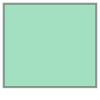

In [6]:
polygon = gp.read_file('/content/drive/MyDrive/PhD_Main_Folder/Geo_Data/PR_GEDI_Data/Neon_Site.geojson')
polygon['geometry'][0]

In [19]:
params = {
    "concept_id" : conceptID,
    "temporal": tempRange,
    "polygon": list(polygon['geometry'][0].exterior.coords),
    # bounding_box = bbx,
    "count": 200
}

In [20]:
results = earthaccess.search_data(**params)

In [21]:
results

[Collection: {'ShortName': 'GEDI02_B', 'Version': '002'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': -80.0483689326, 'Latitude': 0.1197180545}, {'Longitude': -77.8861012299, 'Latitude': 3.1852311162}, {'Longitude': -75.7097323786, 'Latitude': 6.2447913577}, {'Longitude': -73.5047718809, 'Latitude': 9.2929225126}, {'Longitude': -71.2571114757, 'Latitude': 12.3233093217}, {'Longitude': -68.9517138843, 'Latitude': 15.3294903379}, {'Longitude': -66.5727510134, 'Latitude': 18.3046223554}, {'Longitude': -34.5827642202, 'Latitude': 44.0475727063}, {'Longitude': -30.0364345878, 'Latitude': 45.9217990613}, {'Longitude': -25.1772147569, 'Latitude': 47.5817567739}, {'Longitude': -20.0094860606, 'Latitude': 48.9981687346}, {'Longitude': -14.5594887292, 'Latitude': 50.1474241534}, {'Longitude': -8.8666362755, 'Latitude': 51.003328341}, {'Longitude': -2.9935512483, 'Latitude': 51.549470632}, {'Longitude': 2.9811961857, 'Latitude':

In [22]:
data_links = [granule.data_links(access="external") for granule in results]
data_links

[['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_B.002/GEDI02_B_2019246042645_O04104_02_T00259_02_003_01_V002/GEDI02_B_2019246042645_O04104_02_T00259_02_003_01_V002.h5'],
 ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_A.002/GEDI02_A_2019246042645_O04104_02_T00259_02_003_02_V002/GEDI02_A_2019246042645_O04104_02_T00259_02_003_02_V002.h5'],
 ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_A.002/GEDI02_A_2020104212032_O07573_03_T01382_02_003_01_V002/GEDI02_A_2020104212032_O07573_03_T01382_02_003_01_V002.h5'],
 ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_B.002/GEDI02_B_2020104212032_O07573_03_T01382_02_003_01_V002/GEDI02_B_2020104212032_O07573_03_T01382_02_003_01_V002.h5'],
 ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/GEDI02_A.002/GEDI02_A_2020209182349_O09199_02_T03105_02_003_01_V002/GEDI02_A_2020209182349_O09199_02_T03105_02_003_01_V002.h5'],
 ['https://data.lpdaac.earthda

In [25]:
import earthaccess
earthaccess.login(persist=True)

Enter your Earthdata Login username: tjm0042
Enter your Earthdata password: ··········


In [26]:
# Only downloaded the first 2 granules
downloaded_files = earthaccess.download(
    results,
    local_path= path,
)


QUEUEING TASKS | :   0%|          | 0/38 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/38 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/38 [00:00<?, ?it/s]

# Grab relevant variables and spatially clip with Geojson and export as an appended table

In [ ]:
# import h5py
# import pandas as pd
# import os
# from glob import glob
# import numpy as np


# def safe_get(dataset_path, f, fallback_length=None):
#     """Safely retrieve dataset or return fallback NaN array if missing."""
#     try:
#         return f[dataset_path][:]
#     except:
#         if fallback_length is not None:
#             return np.full(fallback_length, np.nan)
#         return None


# # -------- Paths --------
# input_folder = path #'./GEDI_files'  # Change this to your GEDI .h5 folder
# output_csv = 'GEDI_L2A_L2B_combined_unfiltered.csv'

# h5_files = glob(os.path.join(input_folder, '*.h5'))
# all_data = []

# for file_path in h5_files:
#     print(f"\n🔍 Processing file: {os.path.basename(file_path)}")
#     try:
#         with h5py.File(file_path, 'r') as f:
#             beam_names = [key for key in f.keys() if key.startswith('BEAM')]

#             for beam in beam_names:
#                 try:
#                     # --- Base dataset for record count ---
#                     shot_num = safe_get(f'{beam}/shot_number', f)
#                     if shot_num is None:
#                         continue
#                     num_records = len(shot_num)

#                     # --- L2A variables ---
#                     rh_array = safe_get(f'{beam}/rh', f)
#                     rh98 = rh_array[:, 98] if rh_array is not None else np.full(num_records, np.nan)
#                     rh100 = rh_array[:, 100] if rh_array is not None else np.full(num_records, np.nan)

#                     l2a_data = {
#                         'shot_number': shot_num,
#                         'lat_GEDI2A': safe_get(f'{beam}/lat_lowestmode', f, num_records),
#                         'lon_GEDI2A': safe_get(f'{beam}/lon_lowestmode', f, num_records),
#                         'rh98_GEDI2A': rh98,
#                         'rh100_GEDI2A': rh100,
#                         'elev_highest_GEDI2A': safe_get(f'{beam}/elev_highestreturn', f, num_records),
#                         'elev_lowest_GEDI2A': safe_get(f'{beam}/elev_lowestmode', f, num_records),
#                         'height_lastbin_GEDI2A': safe_get(f'{beam}/height_lastbin', f, num_records),
#                         'sensitivity_GEDI2A': safe_get(f'{beam}/sensitivity', f, num_records),
#                         'l2a_quality_flag_GEDI2A': safe_get(f'{beam}/quality_flag', f, num_records),
#                     }

#                     # --- L2B variables ---
#                     l2b_data = {
#                         'cover_GEDI2B': safe_get(f'{beam}/cover', f, num_records),
#                         'pai_GEDI2B': safe_get(f'{beam}/pai', f, num_records),
#                         'fhd_normal_GEDI2B': safe_get(f'{beam}/fhd_normal', f, num_records),
#                         'omega_GEDI2B': safe_get(f'{beam}/omega', f, num_records),
#                         'pgap_theta_GEDI2B': safe_get(f'{beam}/pgap_theta', f, num_records),
#                         'pgap_theta_error_GEDI2B': safe_get(f'{beam}/pgap_theta_error', f, num_records),
#                         'lat_GEDI2B': safe_get(f'{beam}/lat_lowestmode', f, num_records),
#                         'lon_GEDI2B': safe_get(f'{beam}/lon_lowestmode', f, num_records),
#                         'l2b_quality_flag_GEDI2B': safe_get(f'{beam}/l2b_quality_flag', f, num_records),
#                     }

#                     # --- Combine data into DataFrame ---
#                     df = pd.DataFrame({
#                         'file': os.path.basename(file_path),
#                         'beam': beam,
#                         **l2a_data,
#                         **l2b_data
#                     })

#                     print(f"✔ Beam {beam}: {len(df)} records added")
#                     all_data.append(df)

#                 except Exception as beam_error:
#                     print(f"⚠️ Skipping beam {beam} due to error: {beam_error}")
#                     continue

#     except Exception as file_error:
#         print(f"❌ Failed to process {file_path}: {file_error}")
#         continue

# # -------- Save combined CSV --------
# if all_data:
#     final_df = pd.concat(all_data, ignore_index=True)
#     final_df.to_csv(output_csv, index=False)
#     print(f"\n✅ DONE: Saved {len(final_df)} total records to: {output_csv}")
# else:
#     print("\n⚠️ No valid data extracted.")




🔍 Processing file: GEDI02_B_2020104212032_O07573_03_T01382_02_003_01_V002.h5


In [ ]:
# df_out = pd.read_csv('GEDI_L2A_L2B_combined_unfiltered.csv')
# print(df_out)

In [13]:
import h5py
import pandas as pd
import os
from glob import glob
import numpy as np
import geopandas as gpd
from shapely.geometry import Point


def safe_get(dataset_path, f, fallback_length=None):
    """Safely retrieve dataset or return fallback NaN array if missing."""
    try:
        return f[dataset_path][:]
    except:
        if fallback_length is not None:
            return np.full(fallback_length, np.nan)
        return None


# -------- Paths --------
input_folder = path # './GEDI_files'  # Folder with .h5 GEDI files
geojson_path = './Neon_Site.geojson'  # Path to the polygon GeoJSON
output_csv = 'GEDI_L2A_L2B_spatial_filtered.csv'

# Load spatial filter (must be in WGS84)
site_gdf = gpd.read_file(geojson_path).to_crs(epsg=4326)

site_geometry = site_gdf.geometry.union_all()
print("📐 GeoJSON Bounds:", site_geometry.bounds)



h5_files = glob(os.path.join(input_folder, '*.h5'))
all_data = []

for file_path in h5_files:
    print(f"\n🔍 Processing file: {os.path.basename(file_path)}")
    try:
        with h5py.File(file_path, 'r') as f:
            beam_names = [key for key in f.keys() if key.startswith('BEAM')]

            for beam in beam_names:
                try:
                    shot_num = safe_get(f'{beam}/shot_number', f)
                    if shot_num is None:
                        continue
                    num_records = len(shot_num)

                    # L2A variables
                    rh_array = safe_get(f'{beam}/rh', f)
                    rh98 = rh_array[:, 98] if rh_array is not None else np.full(num_records, np.nan)
                    rh100 = rh_array[:, 100] if rh_array is not None else np.full(num_records, np.nan)

                    lat_a = safe_get(f'{beam}/lat_lowestmode', f, num_records)
                    lon_a = safe_get(f'{beam}/lon_lowestmode', f, num_records)

                    l2a_data = {
                        'shot_number': shot_num,
                        'lat_GEDI2A': lat_a,
                        'lon_GEDI2A': lon_a,
                        'rh98_GEDI2A': rh98,
                        'rh100_GEDI2A': rh100,
                        'elev_highest_GEDI2A': safe_get(f'{beam}/elev_highestreturn', f, num_records),
                        'elev_lowest_GEDI2A': safe_get(f'{beam}/elev_lowestmode', f, num_records),
                        'height_lastbin_GEDI2A': safe_get(f'{beam}/height_lastbin', f, num_records),
                        'sensitivity_GEDI2A': safe_get(f'{beam}/sensitivity', f, num_records),
                        'l2a_quality_flag_GEDI2A': safe_get(f'{beam}/quality_flag', f, num_records),
                    }

                    # L2B variables
                    l2b_data = {
                        'cover_GEDI2B': safe_get(f'{beam}/cover', f, num_records),
                        'pai_GEDI2B': safe_get(f'{beam}/pai', f, num_records),
                        'fhd_normal_GEDI2B': safe_get(f'{beam}/fhd_normal', f, num_records),
                        'omega_GEDI2B': safe_get(f'{beam}/omega', f, num_records),
                        'pgap_theta_GEDI2B': safe_get(f'{beam}/pgap_theta', f, num_records),
                        'pgap_theta_error_GEDI2B': safe_get(f'{beam}/pgap_theta_error', f, num_records),
                        'lat_GEDI2B': safe_get(f'{beam}/lat_lowestmode', f, num_records),
                        'lon_GEDI2B': safe_get(f'{beam}/lon_lowestmode', f, num_records),
                        'l2b_quality_flag_GEDI2B': safe_get(f'{beam}/l2b_quality_flag', f, num_records),
                    }

                    # Combine into DataFrame
                    df = pd.DataFrame({
                        'file': os.path.basename(file_path),
                        'beam': beam,
                        **l2a_data,
                        **l2b_data
                    })

                    # Spatial filter using GEDI2A lat/lon
                    geometry = [Point(xy) for xy in zip(df['lon_GEDI2A'], df['lat_GEDI2A'])]
                    gedi_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

                    gedi_clipped = gedi_gdf[gedi_gdf.geometry.within(site_geometry)]

                    print(f"✔ Beam {beam}: {len(gedi_clipped)} points within spatial filter")
                    if not gedi_clipped.empty:
                        all_data.append(gedi_clipped.drop(columns='geometry'))

                except Exception as beam_error:
                    print(f"⚠️ Skipping beam {beam} due to error: {beam_error}")
                    continue

    except Exception as file_error:
        print(f"❌ Failed to process {file_path}: {file_error}")
        continue

# Save CSV
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv(output_csv, index=False)
    print(f"\n✅ DONE: Saved {len(final_df)} filtered records to: {output_csv}")
else:
    print("\n⚠️ No data matched the spatial filter.")


📐 GeoJSON Bounds: (-66.86627662542305, 17.96940935130884, -66.85683909860474, 17.977914795184873)

🔍 Processing file: GEDI02_B_2020104212032_O07573_03_T01382_02_003_01_V002.h5
✔ Beam BEAM0000: 0 points within spatial filter
✔ Beam BEAM0001: 0 points within spatial filter
✔ Beam BEAM0010: 0 points within spatial filter
✔ Beam BEAM0011: 0 points within spatial filter
✔ Beam BEAM0101: 0 points within spatial filter
✔ Beam BEAM0110: 0 points within spatial filter
✔ Beam BEAM1000: 0 points within spatial filter
✔ Beam BEAM1011: 0 points within spatial filter

🔍 Processing file: GEDI02_A_2020104212032_O07573_03_T01382_02_003_01_V002.h5
✔ Beam BEAM0000: 0 points within spatial filter
✔ Beam BEAM0001: 0 points within spatial filter
✔ Beam BEAM0010: 0 points within spatial filter
✔ Beam BEAM0011: 14 points within spatial filter
✔ Beam BEAM0101: 3 points within spatial filter
✔ Beam BEAM0110: 0 points within spatial filter
✔ Beam BEAM1000: 0 points within spatial filter
✔ Beam BEAM1011: 0 points

In [14]:
df_out = pd.read_csv('GEDI_L2A_L2B_spatial_filtered.csv')
print(df_out)

                                                  file      beam  \
0    GEDI02_A_2020104212032_O07573_03_T01382_02_003...  BEAM0011   
1    GEDI02_A_2020104212032_O07573_03_T01382_02_003...  BEAM0011   
2    GEDI02_A_2020104212032_O07573_03_T01382_02_003...  BEAM0011   
3    GEDI02_A_2020104212032_O07573_03_T01382_02_003...  BEAM0011   
4    GEDI02_A_2020104212032_O07573_03_T01382_02_003...  BEAM0011   
..                                                 ...       ...   
234  GEDI02_A_2023072083405_O24061_03_T01382_02_003...  BEAM0101   
235  GEDI02_A_2023072083405_O24061_03_T01382_02_003...  BEAM0101   
236  GEDI02_A_2023072083405_O24061_03_T01382_02_003...  BEAM0101   
237  GEDI02_A_2023072083405_O24061_03_T01382_02_003...  BEAM0101   
238  GEDI02_A_2023072083405_O24061_03_T01382_02_003...  BEAM0101   

            shot_number  lat_GEDI2A  lon_GEDI2A  rh98_GEDI2A  rh100_GEDI2A  \
0     75730300300460574   17.977800  -66.861475         7.82          8.98   
1     75730300300460575   1